# A brief guide to FIt-SNE. Visualizing MNIST

Author: Dmitry Kobak

In [2]:
%matplotlib notebook

import numpy as np
import pylab as plt
import seaborn as sns; sns.set()

# the path should point to the FIt-SNE directory
import sys; sys.path.append('../')
from fast_tsne import fast_tsne

In [17]:
# Load MNIST data
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float') / 255
x_test  =  x_test.reshape(10000, 784).astype('float') / 255
X = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))
print(X.shape)

# Do PCA and keep 50 dimensions
X = X - X.mean(axis=0)
U, s, V = np.linalg.svd(X, full_matrices=False)
X50 = np.dot(U, np.diag(s))[:,:50]

# 10 nice colors
col = np.array(['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99',
                '#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a'])

(70000, 784)


CPU times: user 685 ms, sys: 84.2 ms, total: 769 ms
Wall time: 58.7 s


<IPython.core.display.Javascript object>


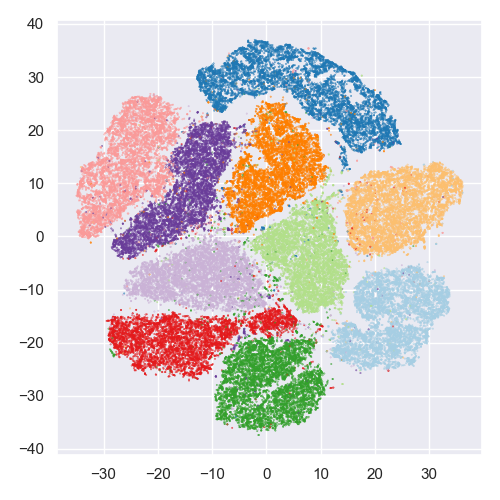

In [15]:
# Running t-SNE on the full MNIST in the default way (this uses perplexity=30)

%time Z = fast_tsne(X50, seed=42)

plt.figure(figsize=(5,5))
plt.scatter(Z[:,0], Z[:,1], c=col[y], s=.1)
plt.tight_layout()

It is almost always a good idea to use PCA initialization

And for large datasets it is always a good idea to increase the learning rate. Here we use 1000, but for even larger data sets n/12 is a good choice. 

See here for discussion: https://www.nature.com/articles/s41467-019-13056-x.

CPU times: user 719 ms, sys: 99.5 ms, total: 819 ms
Wall time: 1min 20s


<IPython.core.display.Javascript object>


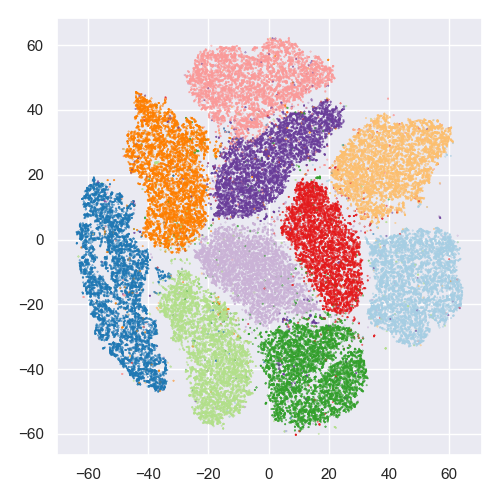

In [16]:
# With PCA initialization and high learning rate

PCAinit = X50[:,:2] / np.std(X50[:,0]) * 0.0001
%time Z = fast_tsne(X50, initialization=PCAinit, learning_rate=1000)

plt.figure(figsize=(5,5))
plt.scatter(Z[:,0], Z[:,1], c=col[y], s=.1)
plt.tight_layout()

## Changing the random seed used for initialization

CPU times: user 751 ms, sys: 104 ms, total: 854 ms
Wall time: 59.6 s
CPU times: user 711 ms, sys: 136 ms, total: 847 ms
Wall time: 1min 4s


<IPython.core.display.Javascript object>


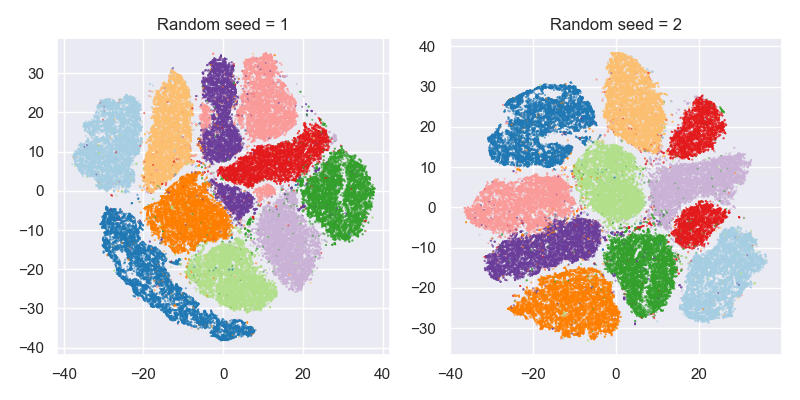

In [18]:
%time Z1 = fast_tsne(X50, seed=1)
%time Z2 = fast_tsne(X50, seed=2)

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(Z1[:,0], Z1[:,1], c=col[y], s=.1)
plt.title('Random seed = 1')
plt.subplot(122)
plt.scatter(Z2[:,0], Z2[:,1], c=col[y], s=.1)
plt.title('Random seed = 2')
plt.tight_layout()

Note how clusters sometimes get split into multiple subclusters. This can be fixed by increasing the learning rate, as shown below for the same random seeds.

CPU times: user 686 ms, sys: 90.3 ms, total: 776 ms
Wall time: 1min 18s
CPU times: user 682 ms, sys: 108 ms, total: 791 ms
Wall time: 1min 22s


<IPython.core.display.Javascript object>


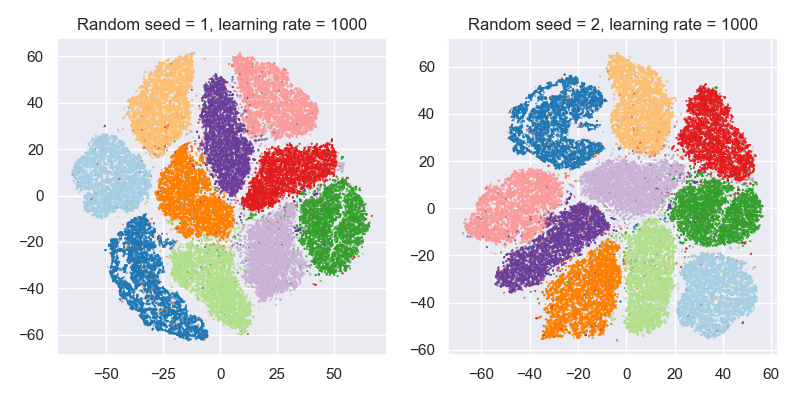

In [20]:
%time Z1 = fast_tsne(X50, seed=1, learning_rate=1000)
%time Z2 = fast_tsne(X50, seed=2, learning_rate=1000)

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(Z1[:,0], Z1[:,1], c=col[y], s=.1)
plt.title('Random seed = 1, learning rate = 1000')
plt.subplot(122)
plt.scatter(Z2[:,0], Z2[:,1], c=col[y], s=.1)
plt.title('Random seed = 2, learning rate = 1000')
plt.tight_layout()

## Changing perplexity

CPU times: user 683 ms, sys: 80.3 ms, total: 763 ms
Wall time: 1min 18s
CPU times: user 725 ms, sys: 52.9 ms, total: 777 ms
Wall time: 6min 46s


<IPython.core.display.Javascript object>


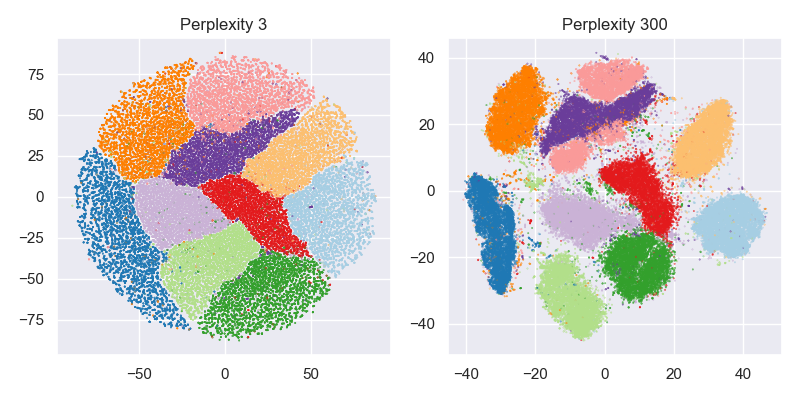

In [52]:
%time Z1 = fast_tsne(X50, perplexity=3,   initialization=PCAinit, learning_rate=1000)
%time Z2 = fast_tsne(X50, perplexity=300, initialization=PCAinit, learning_rate=1000)

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(Z1[:,0], Z1[:,1], c=col[y], s=.1)
plt.title('Perplexity 3')
plt.subplot(122)
plt.scatter(Z2[:,0], Z2[:,1], c=col[y], s=.1)
plt.title('Perplexity 300')
plt.tight_layout()

## Exaggeration
Exaggeration is applied after the early exaggeration phase is over. By default, early exaggeration lasts 250 iterations, with coefficient 12.

CPU times: user 732 ms, sys: 68.6 ms, total: 801 ms
Wall time: 1min
CPU times: user 724 ms, sys: 72.4 ms, total: 796 ms
Wall time: 1min 7s


<IPython.core.display.Javascript object>


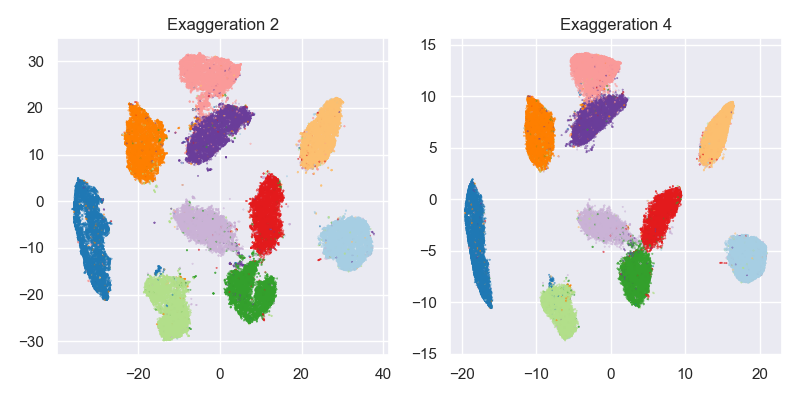

In [25]:
%time Z1 = fast_tsne(X50, learning_rate=1000, initialization=PCAinit, late_exag_coeff=2, start_late_exag_iter=250)
%time Z2 = fast_tsne(X50, learning_rate=1000, initialization=PCAinit, late_exag_coeff=4, start_late_exag_iter=250)

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(Z1[:,0], Z1[:,1], c=col[y], s=.1)
plt.title('Exaggeration 2')
plt.subplot(122)
plt.scatter(Z2[:,0], Z2[:,1], c=col[y], s=.1)
plt.title('Exaggeration 4')
plt.tight_layout()

## Making the kernel more/less heavy-tailed
The default Cauchy kernel corresponds to `df=1`. Large `df` corresponds to the Gaussian kernel.

See https://ecmlpkdd2019.org/downloads/paper/327.pdf

CPU times: user 690 ms, sys: 80.9 ms, total: 770 ms
Wall time: 1min 8s
CPU times: user 691 ms, sys: 72.3 ms, total: 763 ms
Wall time: 1min 19s


<IPython.core.display.Javascript object>


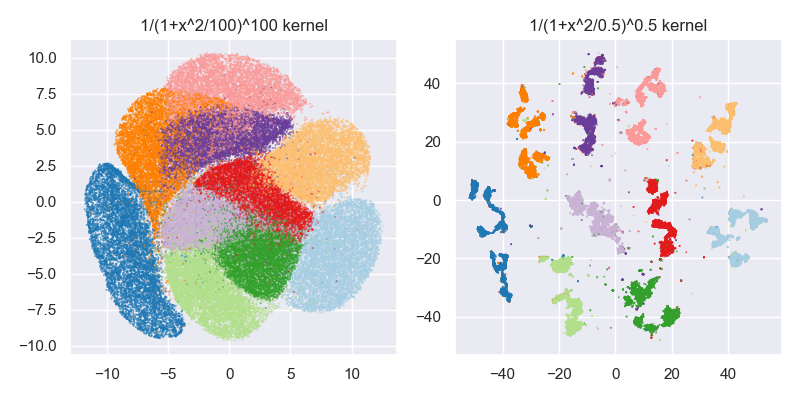

In [38]:
%time Z1 = fast_tsne(X50, learning_rate=1000, initialization=PCAinit, df=100)
%time Z2 = fast_tsne(X50, learning_rate=1000, initialization=PCAinit, df=.5)

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(Z1[:,0], Z1[:,1], c=col[y], s=.1)
plt.title('1/(1+x^2/100)^100 kernel')
plt.subplot(122)
plt.scatter(Z2[:,0], Z2[:,1], c=col[y], s=.1)
plt.title('1/(1+x^2/0.5)^0.5 kernel')
plt.tight_layout()

## 1-dimensional embedding

CPU times: user 682 ms, sys: 92 ms, total: 774 ms
Wall time: 1min 6s
CPU times: user 654 ms, sys: 72.6 ms, total: 727 ms
Wall time: 29.6 s


<IPython.core.display.Javascript object>


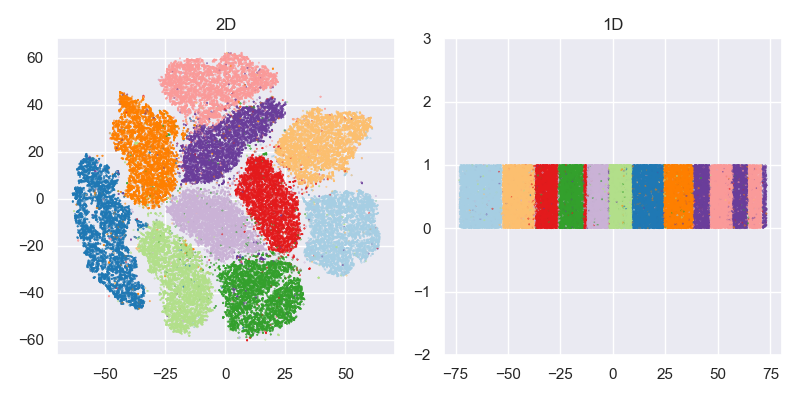

In [26]:
%time Z1 = fast_tsne(X50, initialization=PCAinit, learning_rate=1000)
%time Z2 = fast_tsne(X50, initialization=PCAinit, learning_rate=1000, map_dims=1)

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(Z1[:,0], Z1[:,1], c=col[y], s=.1)
plt.title('2D')
plt.subplot(122)
plt.scatter(Z2[:,0], np.random.uniform(size=Z2.shape[0]), c=col[y], s=.1)
plt.ylim([-2,3])
plt.title('1D')
plt.tight_layout()

## Fixed sigma instead of perplexity

CPU times: user 701 ms, sys: 80.6 ms, total: 781 ms
Wall time: 1min 22s
CPU times: user 692 ms, sys: 79.1 ms, total: 771 ms
Wall time: 57.6 s


<IPython.core.display.Javascript object>


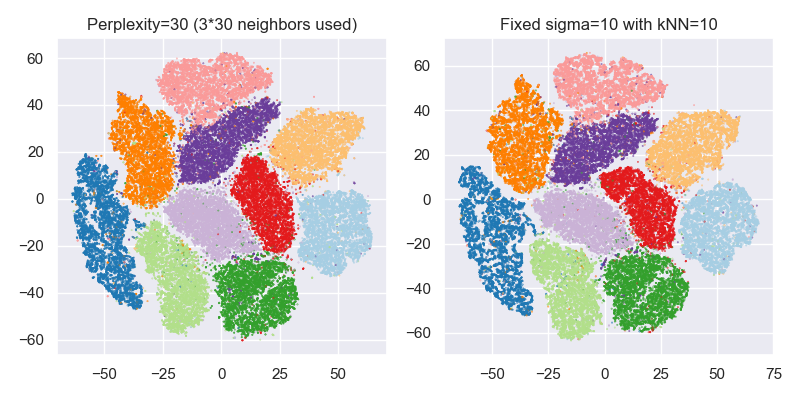

In [51]:
%time Z1 = fast_tsne(X50, initialization=PCAinit, learning_rate=1000)
%time Z2 = fast_tsne(X50, initialization=PCAinit, learning_rate=1000, sigma=10, K=10)

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(Z1[:,0], Z1[:,1], c=col[y], s=.1)
plt.title('Perplexity=30 (3*30 neighbors used)')
plt.subplot(122)
plt.scatter(Z2[:,0], Z2[:,1], c=col[y], s=.1)
plt.title('Fixed sigma=10 with kNN=10')
plt.tight_layout()

## Perplexity combination
Is not useful for MNIST, but can be useful in other cases, see https://www.nature.com/articles/s41467-019-13056-x.

CPU times: user 686 ms, sys: 96.5 ms, total: 782 ms
Wall time: 1min 14s
CPU times: user 716 ms, sys: 88.3 ms, total: 804 ms
Wall time: 7min 8s


<IPython.core.display.Javascript object>


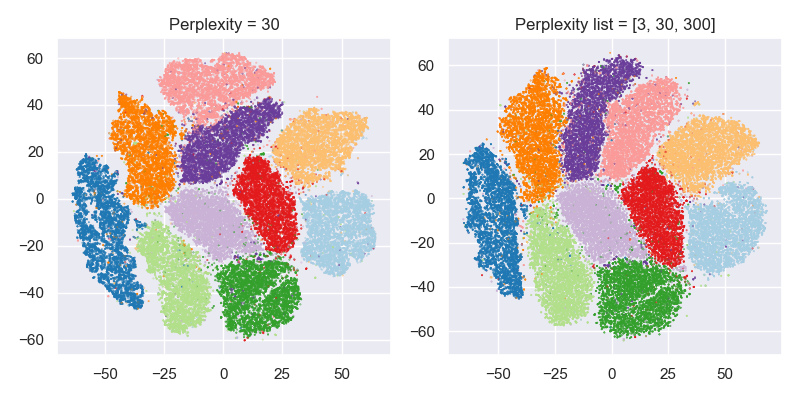

In [53]:
%time Z1 = fast_tsne(X50, initialization=PCAinit, learning_rate=1000)
%time Z2 = fast_tsne(X50, perplexity_list=[3,30,300], initialization=PCAinit, learning_rate=1000)

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(Z1[:,0], Z1[:,1], c=col[y], s=.1)
plt.title('Perplexity = 30')
plt.subplot(122)
plt.scatter(Z2[:,0], Z2[:,1], c=col[y], s=.1)
plt.title('Perplexity list = [3, 30, 300]')
plt.tight_layout()

## VP tree vs ANNOY for kNN search

CPU times: user 701 ms, sys: 80.3 ms, total: 781 ms
Wall time: 1min 16s
CPU times: user 725 ms, sys: 52.9 ms, total: 778 ms
Wall time: 2min 29s


<IPython.core.display.Javascript object>


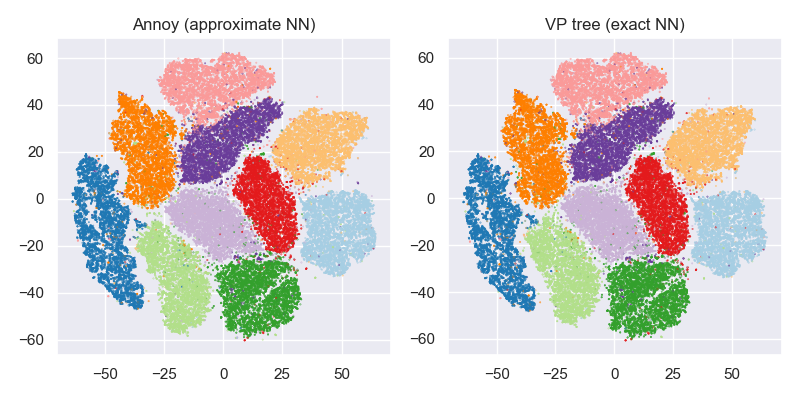

In [37]:
%time Z1 = fast_tsne(X50, initialization=PCAinit, learning_rate=1000)
%time Z2 = fast_tsne(X50, initialization=PCAinit, learning_rate=1000, knn_algo='vp-tree')

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(Z1[:,0], Z1[:,1], c=col[y], s=.1)
plt.title('Annoy (approximate NN)')
plt.subplot(122)
plt.scatter(Z2[:,0], Z2[:,1], c=col[y], s=.1)
plt.title('VP tree (exact NN)')
plt.tight_layout()

## Barnes-Hut vs FFT to approximate repulsive forces during gradient descent 
Using a subsampled dataset here, to speed up Barnes-Hut.

In [35]:
# Subsampling 

np.random.seed(42)
ind10k = np.random.choice(X.shape[0], 10000, replace=False)

CPU times: user 608 ms, sys: 52 ms, total: 660 ms
Wall time: 28.3 s
CPU times: user 607 ms, sys: 52.8 ms, total: 660 ms
Wall time: 2min 37s


<IPython.core.display.Javascript object>


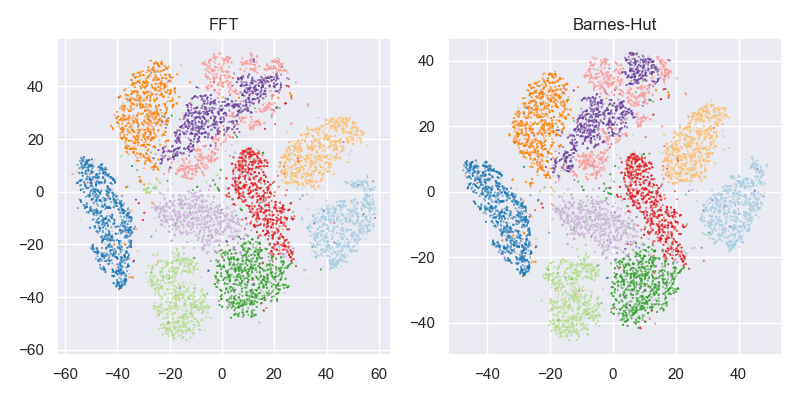

In [36]:
%time Z1 = fast_tsne(X50[ind10k,:], initialization=PCAinit[ind10k,:])
%time Z2 = fast_tsne(X50[ind10k,:], initialization=PCAinit[ind10k,:], nbody_algo='Barnes-Hut')

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(Z1[:,0], Z1[:,1], c=col[y[ind10k]], s=.1)
plt.title('FFT')
plt.subplot(122)
plt.scatter(Z2[:,0], Z2[:,1], c=col[y[ind10k]], s=.1)
plt.title('Barnes-Hut')
plt.tight_layout()

## Exact t-SNE

In [44]:
# Subsampling 

np.random.seed(42)
ind2k = np.random.choice(X.shape[0], 2000, replace=False)

CPU times: user 6.21 ms, sys: 48.5 ms, total: 54.7 ms
Wall time: 23.4 s
CPU times: user 9.03 ms, sys: 24.2 ms, total: 33.3 ms
Wall time: 2min 30s


<IPython.core.display.Javascript object>


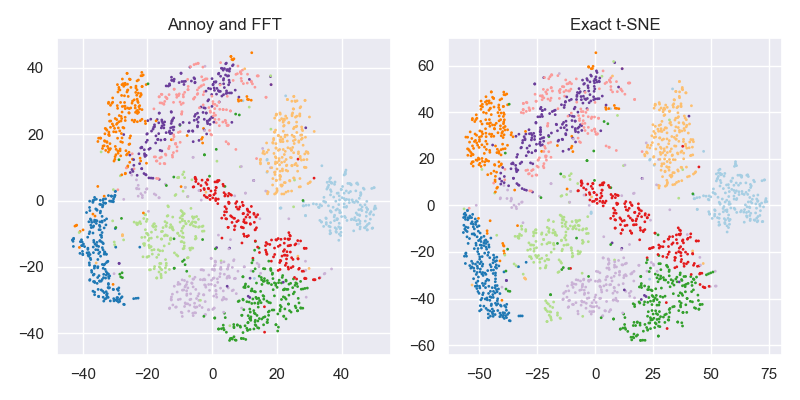

In [47]:
%time Z1 = fast_tsne(X50[ind2k,:], initialization=PCAinit[ind2k,:])
%time Z2 = fast_tsne(X50[ind2k,:], initialization=PCAinit[ind2k,:], theta=0)

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(Z1[:,0], Z1[:,1], c=col[y[ind2k]], s=1)
plt.title('Annoy and FFT')
plt.subplot(122)
plt.scatter(Z2[:,0], Z2[:,1], c=col[y[ind2k]], s=1)
plt.title('Exact t-SNE')
plt.tight_layout()

## Loading and saving input similarities

CPU times: user 675 ms, sys: 85 ms, total: 760 ms
Wall time: 1min 8s
CPU times: user 708 ms, sys: 85 ms, total: 793 ms
Wall time: 1min 6s


<IPython.core.display.Javascript object>


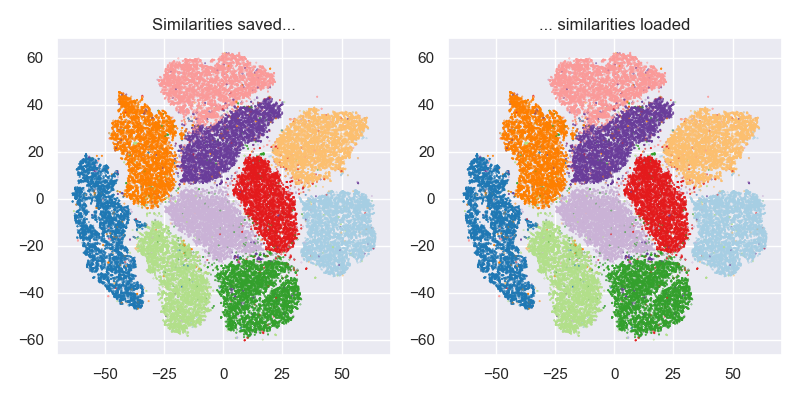

In [50]:
%time Z1 = fast_tsne(X50, initialization=PCAinit, learning_rate=1000, load_affinities = 'save')
%time Z2 = fast_tsne(X50, initialization=PCAinit, learning_rate=1000, load_affinities = 'load')

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(Z1[:,0], Z1[:,1], c=col[y], s=.1)
plt.title('Similarities saved...')
plt.subplot(122)
plt.scatter(Z2[:,0], Z2[:,1], c=col[y], s=.1)
plt.title('... similarities loaded')
plt.tight_layout()

CPU times: user 6.43 ms, sys: 36.4 ms, total: 42.8 ms
Wall time: 2min 30s
CPU times: user 5.82 ms, sys: 28.1 ms, total: 33.9 ms
Wall time: 2min 27s


<IPython.core.display.Javascript object>


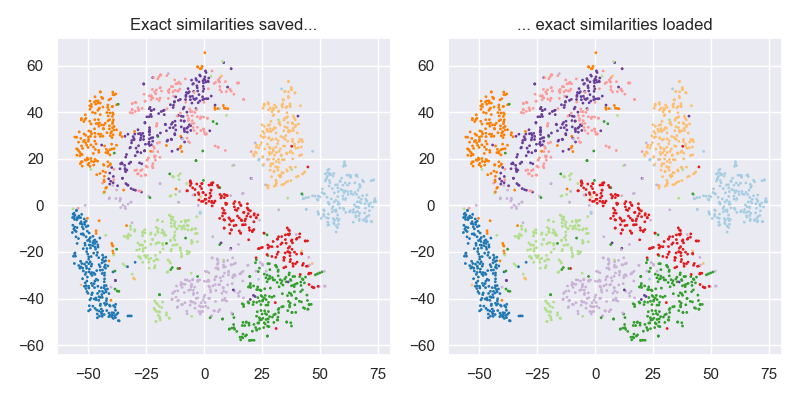

In [49]:
# And now for the exact t-SNE

%time Z1 = fast_tsne(X50[ind2k,:], initialization=PCAinit[ind2k,:], theta=0, load_affinities = 'save')
%time Z2 = fast_tsne(X50[ind2k,:], initialization=PCAinit[ind2k,:], theta=0, load_affinities = 'load')

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(Z1[:,0], Z1[:,1], c=col[y[ind2k]], s=1)
plt.title('Exact similarities saved...')
plt.subplot(122)
plt.scatter(Z2[:,0], Z2[:,1], c=col[y[ind2k]], s=1)
plt.title('... exact similarities loaded')
plt.tight_layout()